In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# read dataset
df = pd.read_csv('data_input/covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [6]:
df['Location'].unique()

array(['Jawa Timur', 'DKI Jakarta', 'Indonesia', 'Jawa Barat', 'Riau',
       'Banten', 'Jawa Tengah', 'Sulawesi Tenggara', 'Bali',
       'Kalimantan Timur', 'Daerah Istimewa Yogyakarta', 'Sumatera Utara',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur'], dtype=object)

In [3]:
#cek informasi dataset berupa tipe data dan memory dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                16283
Province                         495
Country                            0
Continent                          0
Island                           495
Time Zone                        495
Special Status                 13890
Total Regencies                    0
Total Cities                     469
Total Districts                    0
Total Urban Villages             471
Total Rural Villages             496
Area (km2)                         0
Population                         0
Population Density                 0
L

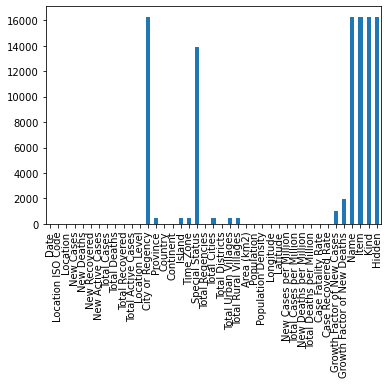

In [8]:
#Check Missing Value and Finding the missing percentage
import matplotlib.pyplot as plt
df.isna().sum().plot(kind="bar");
missing_values_sum = df.isna().sum()
print(missing_values_sum)
missing_values_percent = df.isna().mean()*100
print(missing_values_percent)

<AxesSubplot:>

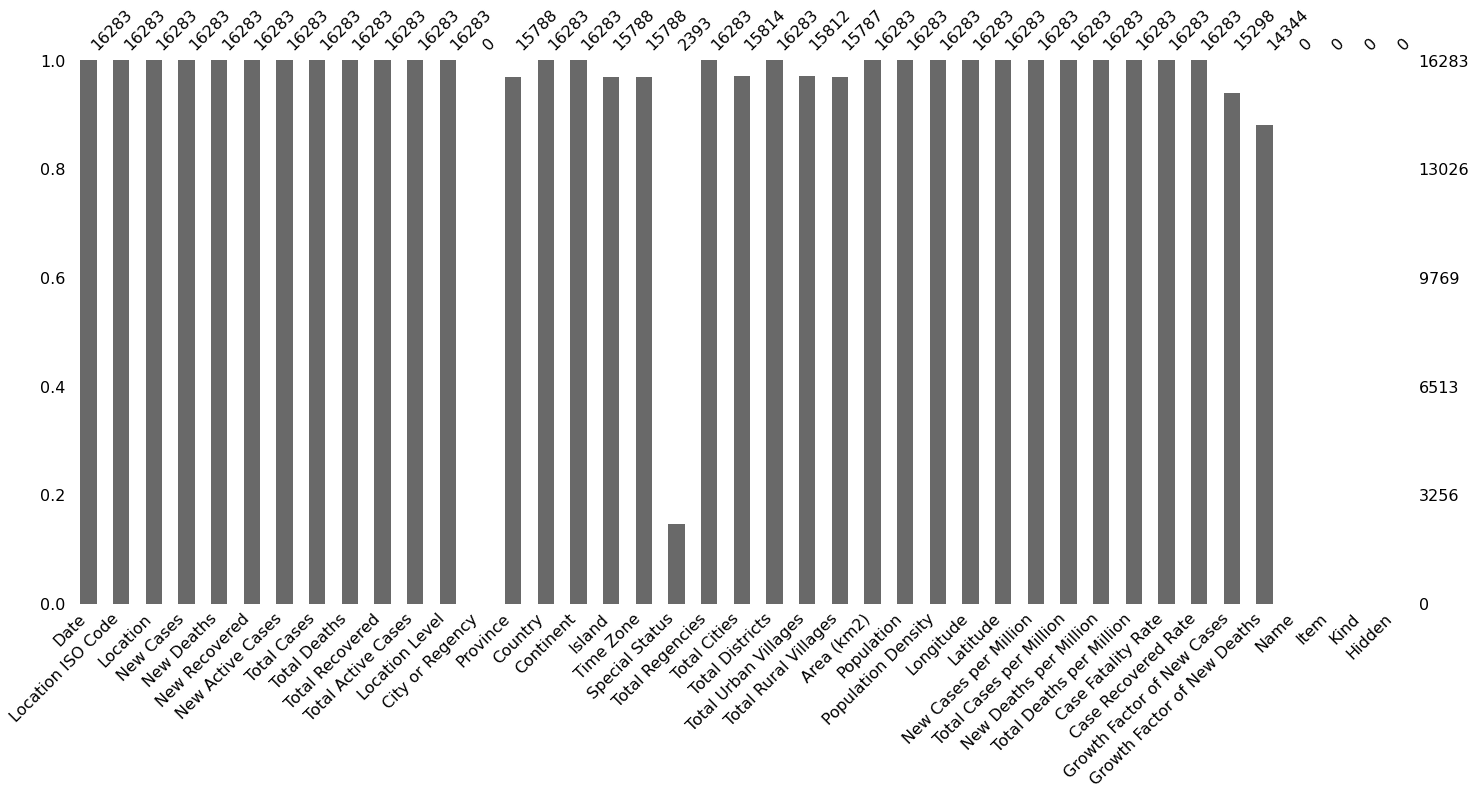

In [11]:
import missingno as msno
msno.bar(df)

In [14]:
# memilih yang hanya berada di lokasi DKI saja.
df_jkt = df[df['Location'] == 'DKI Jakarta']
df_jkt

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
53,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,139,...,0.00,1.84,51.28%,356.41%,NaN,NaN,NaN,NaN,NaN,NaN
55,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,139,...,0.00,1.84,48.78%,339.02%,1.00,1.00,NaN,NaN,NaN,NaN
60,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,139,...,0.00,1.84,46.51%,323.26%,1.00,1.00,NaN,NaN,NaN,NaN
65,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,139,...,0.00,1.84,44.44%,308.89%,1.00,1.00,NaN,NaN,NaN,NaN
70,3/5/2020,ID-JK,DKI Jakarta,0,1,0,-1,45,21,139,...,0.09,1.94,46.67%,308.89%,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,7/5/2021,ID-JK,DKI Jakarta,10902,120,6597,4185,591493,8717,491426,...,11.06,803.70,1.47%,83.08%,1.04,1.82,NaN,NaN,NaN,NaN
16151,7/6/2021,ID-JK,DKI Jakarta,9439,137,6100,3202,600932,8854,497526,...,12.63,816.33,1.47%,82.79%,0.87,1.14,NaN,NaN,NaN,NaN
16185,7/7/2021,ID-JK,DKI Jakarta,9365,142,3655,5568,610297,8996,501181,...,13.09,829.42,1.47%,82.12%,0.99,1.04,NaN,NaN,NaN,NaN
16219,7/8/2021,ID-JK,DKI Jakarta,12974,136,10857,1981,623271,9132,512038,...,12.54,841.96,1.47%,82.15%,1.39,0.96,NaN,NaN,NaN,NaN


In [15]:
# columns selection
df_jkt = df_jkt[['Location', 'Total Cases', 'Total Deaths', 'Total Recovered']]
df_jkt

,Location,Total Cases,Total Deaths,Total Recovered
53,DKI Jakarta,39,20,139
55,DKI Jakarta,41,20,139
60,DKI Jakarta,43,20,139
65,DKI Jakarta,45,20,139
70,DKI Jakarta,45,21,139
...,...,...,...,...
16117,DKI Jakarta,591493,8717,491426
16151,DKI Jakarta,600932,8854,497526
16185,DKI Jakarta,610297,8996,501181
16219,DKI Jakarta,623271,9132,512038


In [21]:
# five number summary
df_jkt.describe()

,Total Cases,Total Deaths,Total Recovered
count,496.000000,496.000000,496.000000
mean,173670.766129,3071.911290,159538.780242
std,173811.064518,2654.452012,163982.692229
min,39.000000,20.000000,139.000000
25%,11736.000000,637.750000,7059.000000
50%,108231.000000,2320.000000,97676.000000
75%,350861.750000,5813.000000,337818.750000
max,636383.000000,9270.000000,527060.000000


In [20]:
# Measure of Central Tendency (ukuran pemusatan data)
print(df_jkt['Total Cases'].mean())
print(df_jkt['Total Deaths'].mean())
print(df_jkt['Total Recovered'].mean())

173670.76612903227
3071.9112903225805
159538.78024193548


In [22]:
print(df_jkt['Total Cases'].median())
print(df_jkt['Total Deaths'].median())
print(df_jkt['Total Recovered'].median())

108231.0
2320.0
97676.0


In [23]:
print(df_jkt['Total Cases'].mode())
print(df_jkt['Total Deaths'].mode())
print(df_jkt['Total Recovered'].mode())

0    45
dtype: int64
0     20
1    479
dtype: int64
0    139
dtype: int64


In [27]:
# Masure of Variance (range)
df_jkt1 = df_jkt[['Total Cases', 'Total Deaths', 'Total Recovered']]

for col in df_jkt1:
    print(df_jkt[col].name + ' range: ' + str(df_jkt[col].max() - df_jkt[col].min()))

Total Cases range: 636344
Total Deaths range: 9250
Total Recovered range: 526921


In [31]:
# Masure of Variance (Percentiles & Quartile)

print(stats.percentileofscore(df_jkt['Total Cases'], 57, 'strict'))
print(stats.percentileofscore(df_jkt['Total Deaths'], 57, 'strict'))
print(stats.percentileofscore(df_jkt['Total Recovered'], 57, 'strict'))

2.82258064516129
4.637096774193548
0.0


In [32]:
print(stats.percentileofscore(df_jkt['Total Cases'], 57, 'weak'))
print(stats.percentileofscore(df_jkt['Total Deaths'], 57, 'weak'))
print(stats.percentileofscore(df_jkt['Total Recovered'], 57, 'weak'))

2.82258064516129
4.637096774193548
0.0


In [33]:
print(stats.percentileofscore(df_jkt['Total Cases'], 50, 'rank'))
print(stats.percentileofscore(df_jkt['Total Deaths'], 50, 'rank'))
print(stats.percentileofscore(df_jkt['Total Recovered'], 50, 'rank'))

2.4193548387096775
4.637096774193548
0.0


In [45]:
print(df_jkt['Total Cases'].quantile([0.25, 0.5, 0.75]))
print(df_jkt['Total Deaths'].quantile([0.25, 0.5, 0.75]))
print(df_jkt['Total Recovered'].quantile([0.25, 0.5, 0.75]))

0.25     11736.00
0.50    108231.00
0.75    350861.75
Name: Total Cases, dtype: float64
0.25     637.75
0.50    2320.00
0.75    5813.00
Name: Total Deaths, dtype: float64
0.25      7059.00
0.50     97676.00
0.75    337818.75
Name: Total Recovered, dtype: float64


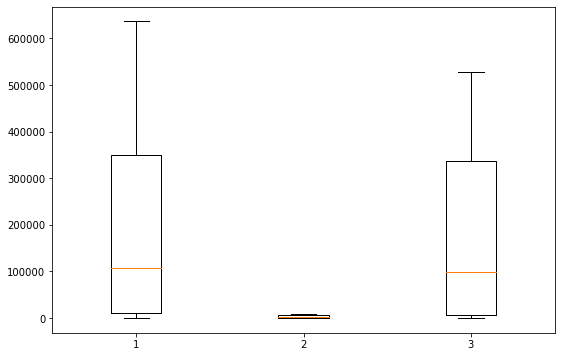

In [39]:
# Quartile with boxplot
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df_jkt1)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [ ]:
# Customize boxplot with colour
## to get fill color
bp = ax.boxplot(df_jkt1, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

# Save the figure
fig.savefig('fig2.png', bbox_inches='tight')

In [47]:
# Variance
print(df_jkt['Total Cases'].var())
print(df_jkt['Total Deaths'].var())
print(df_jkt['Total Recovered'].var())

30210286148.890648
7046115.483023787
26890323350.531406


In [48]:
# standard deviation
print(df_jkt['Total Cases'].std())
print(df_jkt['Total Deaths'].std())
print(df_jkt['Total Recovered'].std())

173811.0645180296
2654.4520118140745
163982.69222857457


In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create a random standard normal distribution
df_jkt(np.random.randn(100000, 1), columns=['Total Cases'])

# Plot the distribution as a histogram with a density curve
Total Cases = df_jkt['Total Cases']
density = stats.gaussian_kde(Total Cases)
n, x, _ = plt.hist(Total Cases, color='lightgrey', bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df_jkt['Total Cases'].std()
m = df_jkt['Total Cases'].mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(Total Cases.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()

SyntaxError: invalid syntax (<ipython-input-52-6dd4e285e655>, line 11)

In [57]:
# Z Score
z = (df_jkt['Total Cases'] - df_jkt['Total Cases'].mean())/ df_jkt['Total Cases'].std()
z

53      -0.998968
55      -0.998957
60      -0.998945
65      -0.998934
70      -0.998934
           ...   
16117    2.403887
16151    2.458194
16185    2.512074
16219    2.586718
16253    2.662156
Name: Total Cases, Length: 496, dtype: float64